# Week06 Inclass Activity Jeopardy Game Show

In [ ]:
#1. Import jeopardy.csv and create a dataframe from the data. Find out the following:
#a. How many rows are there in the dataframe? What does a row represent in this
#dataset? What is the “grain”?
#b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?
#c. How many unique shows were there each year?
#d. How many times was each category used?
#e. Which month (over the years) has had the most shows?
#f. Are there any answers that appeared multiple times? Find the questions for the top
#three most common answers.


In [29]:
import numpy as np
import pandas as pd

In [30]:
jeopardy=pd.read_csv("JEOPARDY_CSV.csv")
jeopardy.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [31]:
#a. How many rows are there in the dataframe? What does a row represent in this dataset? What is the “grain”? 

print(len(jeopardy))

#There are 216930 rows in the dataframe. To state the "grain" of the dataframe, a row summarizes show number, a date on 
#which the episode first aired,round name of the show, six types of categories,clues are valued by dollar amount,
#questions and answers related to the questions.

216930


In [32]:
#b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?

#Data cleaning is the process of detecting and cleaning corrupt or inaccurate records from the dataset, table or dataframe.
#In jeopardy dataset every column name has weird white space before its name.If I call any columns with its name, it will 
#throw an error. 
jeopardy['Value'].count()

KeyError: 'Value'

In [33]:
#In this cell I am giving Value column with blank space and it is giving output.
jeopardy[' Value'].count()

216930

In [34]:
#Renaming column name is also one type of data cleaning.I can remove the empty space before column names and can rename columns.
jeopardy.columns=['Show Number','Air Date','Round','Category','Value','Question','Answer']
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [35]:
#after renamed the columns
jeopardy['Value'].count()

216930

In [36]:
#In the dataframe Value column has $ symbol.Dirty about this column is we are not able to calculate sum with Value column 
#beacause of $ sign. 
jeopardy['Value'].sum()

'$200 $200 $200 $200 $200 $200 $400 $400 $400 $400 $400 $400 $600 $600 $600 $600 $600 $600 $800 $800 $800 $800 $2,000 $800 $1,000 $1,000 $1,000 $1,000 $1,000 $400 $400 $400 $400 $400 $400 $800 $800 $800 $800 $800 $1,200 $2,000 $1,200 $1,200 $1,200 $1,600 $1,600 $1,600 $1,600 $1,600 $2,000 $2,000 $3,200 $2,000 $2,000 None$200 $200 $200 $200 $200 $200 $400 $400 $400 $400 $400 $400 $600 $600 $600 $600 $600 $600 $800 $800 $800 $800 $800 $800 $2,000 $1,000 $1,000 $1,000 $1,000 $1,000 $400 $400 $400 $400 $400 $400 $800 $800 $800 $800 $800 $800 $1,200 $1,200 $1,200 $1,200 $1,200 $1,200 $5,000 $1,600 $1,600 $1,600 $1,600 $5,000 $2,000 $2,000 $2,000 $2,000 $2,000 $2,000 None$100 $100 $100 $100 $100 $100 $200 $200 $200 $200 $200 $200 $300 $300 $300 $300 $300 $300 $400 $400 $500 $400 $400 $400 $500 $500 $500 $500 $500 $200 $200 $200 $200 $200 $200 $400 $400 $400 $400 $400 $400 $600 $600 $600 $600 $600 $600 $800 $1,000 $800 $2,000 $800 $1,000 $1,000 $1,000 $1,000 $1,000 None$100 $100 $100 $100 $10

In [40]:
#we can clean this data by removing $ sign from Value column inorder to perform sum()
jeopardy['Value']=jeopardy['Value'].str.replace('$','').str.replace(',','').str.replace('None','0').astype(int)

C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [42]:
#after removed $ sign, we are able to calculate sum()
jeopardy['Value'].sum()

160525700

In [46]:
#c. How many unique shows were there each year?
# To find unique shows each year, we have to convert air date into date time dtype.
jeopardy['Air Date'] = pd.to_datetime(jeopardy['Air Date'])
jeopardy['Air Date'].head()

0   2004-12-31
1   2004-12-31
2   2004-12-31
3   2004-12-31
4   2004-12-31
Name: Air Date, dtype: datetime64[ns]

In [47]:
jeopardy['Year']=pd.DatetimeIndex(jeopardy['Air Date']).year
year=jeopardy['Year'].head()

In [53]:
#we can groupby year with show number to calculate unique number of shows each year
jeo_show_peryear=jeopardy.groupby(['Year'])['Show Number']
#creating dataframe to display year and corresponding number of shows
jeo_show_peryear_df = jeopardy.groupby('Year').agg(No_of_shows=('Show Number','nunique'))
jeo_show_peryear_df

,No_of_shows
Year,
1984,23
1985,16
1986,25
1987,22
1988,22
1989,36
1990,73
1991,24
1992,32


In [48]:
#d. How many times was each category used?
#To find number of times each category used, we can use value_counts()
jeopardy['Category'].value_counts()

BEFORE & AFTER                   547
SCIENCE                          519
LITERATURE                       496
AMERICAN HISTORY                 418
POTPOURRI                        401
                                ... 
POTPOURRI...NO FOOLIN'             1
BRITISH PAINTERS                   1
MIDWAY ISLAND                      1
THE OXFORD ENGLISH DICTIONARY      1
EXPLORING                          1
Name: Category, Length: 27983, dtype: int64

In [25]:
#e. Which month (over the years) has had the most shows?
jeopardy['Month']=pd.DatetimeIndex(jeopardy['Air Date']).month
month=jeopardy['Month'].head()

In [27]:
jeo_show_month=jeopardy.groupby(['Month'])['Show Number']
jeo_show_month_df=jeopardy.groupby('Month').agg(No_of_shows=('Show Number','nunique'))
jeo_show_month_df.sort_values(['No_of_shows'],ascending=False).head(1)

,No_of_shows
Month,
11,434


In [ ]:
# jeo_show_month_df shows november month had most shows.

In [58]:
#f. Are there any answers that appeared multiple times? Find the questions for the top
#three most common answers.
jeopardy['Answer'].value_counts()
#Yes.Some Answers appeared multiple times. The top three most common answers are China,Australia,Japan.

China                             216
Australia                         215
Japan                             196
Chicago                           194
France                            193
                                 ... 
the Hopis                           1
free parking                        1
Lady Diana Spencer                  1
trailer park                        1
Grigori Alexandrovich Potemkin      1
Name: Answer, Length: 88236, dtype: int64

In [65]:
#finding questions for the top three common answers
jeopardy[jeopardy['Answer']=='China'][['Question']]

,Question
598,In 1958 this country launched its second 5-yea...
1507,"In 1999 this country began 3 ""golden weeks"" of..."
3050,P.F. Chang's is an upscale bistro specializing...
3476,This country's National People's Congress has ...
5990,"Of the 6 nations India borders, this one is th..."
...,...
214506,Principal mountain ranges in this large countr...
215115,Dr. Sun Yat-Sen
215556,Tsingtao
215912,"Because of a policy adopted in 1979, this coun..."


In [66]:
jeopardy[jeopardy['Answer']=='Australia'][['Question']]

,Question
560,A 1994 festival honoring this country featured...
688,Large aboriginal populations live in this coun...
1236,Papua New Guinea is just off this country's Ca...
3175,In 1962 this country's Dawn Fraser became the ...
4373,"It's the lowest, flattest & smallest continent"
...,...
212513,The good folk at gdaypubs.com are making a maj...
212711,Eons of wind & rain have worn away ancient mtn...
213583,Dedicated to upholding this nation's constitut...
214876,If you stay at Cradle Mountain Lodge in this c...


In [68]:
jeopardy[jeopardy['Answer']=='Japan'][['Question']]

,Question
404,In February 1904 this country attacked the Rus...
874,Sanma aisu is fish-flavored ice cream & taco a...
1864,The monster seen here (Godzilla) originally ap...
3106,The mauve flowers of the Paulownia tree adorn ...
4080,This country's 12th century sculptor Unkei is ...
...,...
211129,"On Feb. 8, 1904 this country attacked Port Art..."
214711,"This nation's maritime self-defense force, suc..."
215513,"On July 8, 1853 Matthew Perry presented a lett..."
215568,Kirin


In [78]:
#2. Create a visualization that shows the top 5 categories (those referenced the most often).Be sure to label appropriately.
category=jeopardy['Category'].value_counts().head(5)
category

BEFORE & AFTER      547
SCIENCE             519
LITERATURE          496
AMERICAN HISTORY    418
POTPOURRI           401
Name: Category, dtype: int64

In [80]:
jeo_category_df=pd.DataFrame(category)
jeo_category_df

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


<AxesSubplot:title={'center':'Top 5 Categories'}, xlabel='Category Name', ylabel='No of times appeared '>

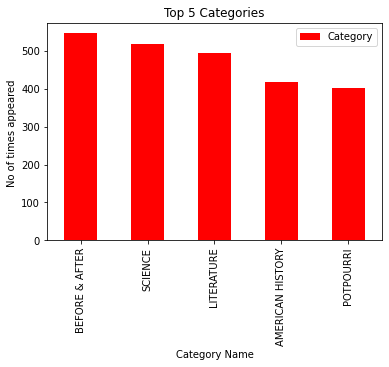

In [90]:
jeo_category_df.plot(kind='bar',xlabel='Category Name',ylabel='No of times appeared ',title='Top 5 Categories',color='r')